In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq
import trueq.simulation as tqs
import numpy as np
import scipy.linalg as la

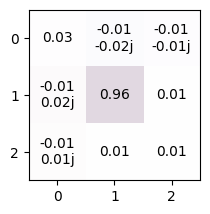

In [3]:
p = 0.05
sim = tq.Simulator()
sim.add_kraus(
    [np.sqrt(1 - p) * np.eye(3), np.sqrt(p) * tq.math.random_unitary(3)], dim=3
)
circuit = tq.Circuit([{0: tq.Gate.x}])
tq.plot_mat(sim.state(circuit).mat())

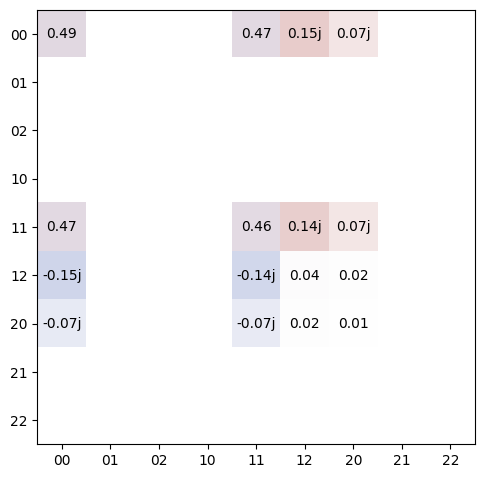

In [4]:
sim = tq.Simulator()
ham = np.zeros((9, 9), dtype=np.complex128)
ham[([0, 6], [6, 0])] = 0.5
ham[([3, 5], [5, 3])] = 1

ops = la.expm(-1j * 0.3 * ham)
sim.add_kraus([ops], match=tqs.GateMatch(tq.Gate.cnot), dim=3)
circuit = tq.Circuit([{0: tq.Gate.h}, {(0, 1): tq.Gate.cx}])
tq.plot_mat(sim.state(circuit).mat(), xlabels=3, ylabels=3)

In [5]:
# define a confusion matrix for a qutrit
confusion = [[0.99, 0.03, 0.02], [0.005, 0.92, 0.18], [0.005, 0.05, 0.8]]

# simulate the effects on all three basis states
circuit = tq.Circuit([{0: tq.Prep()}, {0: tq.Meas()}])
for idx, prep_state in enumerate(np.eye(3)):
    sim = tq.Simulator().add_readout_error(errors={0: confusion}).add_prep(prep_state)
    sim.run(circuit, n_shots=np.inf, overwrite=True)
    print(f"Prepare |{idx}>:", circuit.results)

Prepare |0>: Results({'0': 0.99, '1': 0.005, '2': 0.005}, dim=3)
Prepare |1>: Results({'0': 0.03, '1': 0.92, '2': 0.05}, dim=3)
Prepare |2>: Results({'0': 0.02, '1': 0.18, '2': 0.8}, dim=3)


In [6]:
confusion = [[0.99, 0.08, 0.7], [0.01, 0.92, 0.3]]

# simulate the effects on all three basis states
circuit = tq.Circuit([{0: tq.Prep()}, {0: tq.Meas()}])
for idx, prep_state in enumerate(np.eye(3)):
    sim = tq.Simulator().add_readout_error(errors={0: confusion}).add_prep(prep_state)
    sim.run(circuit, n_shots=np.inf, overwrite=True)
    print(f"Prepare |{idx}>:", circuit.results)

Prepare |0>: Results({'0': 0.99, '1': 0.01})
Prepare |1>: Results({'0': 0.08, '1': 0.92})
Prepare |2>: Results({'0': 0.7, '1': 0.3})


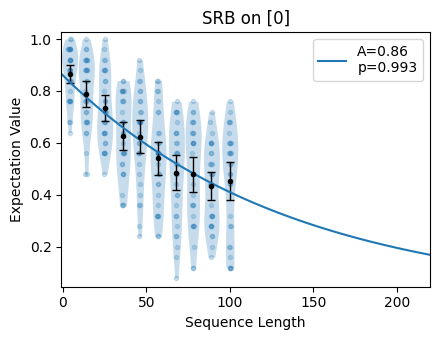

In [7]:
p = 0.01
perm02 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
perm12 = np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]])
sim.add_kraus(
    [np.sqrt(1 - p) * np.eye(3), np.sqrt(p / 2) * perm02, np.sqrt(p / 2) * perm12],
    dim=3,
)
circuits = tq.make_srb(0, np.linspace(4, 100, 10).astype(int))
sim.run(circuits)
circuits.plot.raw()